In [1]:
#importing library requirements
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import pandas as pd
import numpy as np

#initalizing essential global variables
p = Path("./images")
df = pd.read_csv("metadata.csv")
dirs = p.glob("*")


#initializing lists that will be used for data preprocessing.
image_data = [] #array for the data of each image
labels = [] #array for the labels of each image
image_paths = [] #stores all image paths


#creating a key for each label
key = {"akiec":0,"bcc":1,"bkl":2,"df":3,"mel":4,"nv":5,"vasc":6,"norm":7,"obj":8}
lbllist = []


#for loop in order to read data
for folder_dir in dirs:
    
    lbl = str(folder_dir).split("\\")[-1]
    counter = 0
    print(folder_dir)
    
    
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(28,28))
        img = ImageOps.grayscale(img)    
        image_data.append(img)
        labels.append(key[lbl])
        counter += 1
       
    
    
    
    
    
    #this line prints the number of images used to train each category 
    print(counter)




Using TensorFlow backend.


images\akiec
100
images\bcc
100
images\bkl
100
images\df
100
images\mel
100
images\norm
367
images\nv
100
images\obj
192
images\vasc
100


In [2]:
#creating inital pandas-dataframe with label values
intialdict = {} #  empty Dictionary 
df1 = pd.DataFrame(intialdict)
df1["labels"] = labels
 
    
#creating python list that will be used to store each image's 784 pixel values in grayscale
listofpixelvalues = []

#loops through each image to fetch data
for img in image_data:
    listofpixelvalues.append(list(img.getdata()))
    

#creating index that will be used for the pandas-dataframe
k= ['pixel{}'.format(k) for k in range(1,785)]
#print(k)

#appending our indexes to the dataframe
df = pd.DataFrame(listofpixelvalues,columns=k)
#print(listofpixelvalues[0][0])
#print(listofpixelvalues[1][0])


#merging the dataframes for the dataframe.
df = pd.concat([df1, df], axis=1)


#this command displays the first 10 images of the dataframe, each image with a label-value, and 784 pixel data numbers
df.head(10)


#option to download formatted data in csv file
#df.to_csv("finaldata.csv")''''''

,labels,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,121,135,122,127,131,135,134,142,168,...,112,137,140,131,139,115,130,135,118,124
1,0,172,184,174,165,155,172,172,189,192,...,185,167,158,138,181,184,191,185,193,181
2,0,148,166,164,165,155,164,160,167,170,...,180,175,177,165,165,158,160,149,135,137
3,0,180,197,210,205,201,202,214,202,195,...,182,162,171,153,147,152,148,135,136,120
4,0,141,155,162,173,180,184,197,205,192,...,195,211,215,213,198,161,158,167,139,133
5,0,186,192,191,197,210,218,205,177,210,...,234,234,226,219,213,200,195,184,187,173
6,0,151,158,156,163,161,175,169,167,173,...,160,170,170,156,141,143,137,116,132,110
7,0,138,160,144,159,130,155,162,161,176,...,148,155,163,162,165,159,159,152,150,156
8,0,134,143,156,154,165,157,177,176,173,...,186,173,182,164,182,181,178,170,159,158
9,0,153,167,150,172,183,194,180,174,201,...,155,161,158,121,139,157,147,140,108,115


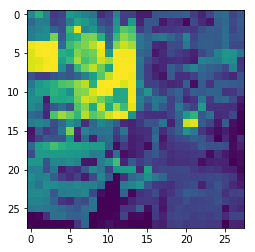

Train on 1133 samples, validate on 126 samples
Epoch 1/500
1133/1133 [==============================] - 1s 653us/step - loss: 2.1567 - acc: 0.2145 - val_loss: 2.1690 - val_acc: 0.2540
Epoch 2/500
1133/1133 [==============================] - 0s 204us/step - loss: 2.1178 - acc: 0.2957 - val_loss: 2.1034 - val_acc: 0.3175
Epoch 3/500
1133/1133 [==============================] - 0s 205us/step - loss: 2.0537 - acc: 0.3575 - val_loss: 2.0526 - val_acc: 0.3254
Epoch 4/500
1133/1133 [==============================] - 0s 210us/step - loss: 2.0050 - acc: 0.3945 - val_loss: 2.0033 - val_acc: 0.3571
Epoch 5/500
1133/1133 [==============================] - 0s 205us/step - loss: 1.9410 - acc: 0.4025 - val_loss: 1.9522 - val_acc: 0.3492
Epoch 6/500
1133/1133 [==============================] - 0s 212us/step - loss: 1.8719 - acc: 0.4078 - val_loss: 1.9018 - val_acc: 0.3571
Epoch 7/500
1133/1133 [==============================] - 0s 210us/step - loss: 1.8204 - acc: 0.4034 - val_loss: 1.8847 - val_acc: 0

1133/1133 [==============================] - 0s 205us/step - loss: 1.0821 - acc: 0.6178 - val_loss: 1.3196 - val_acc: 0.5000
Epoch 61/500
1133/1133 [==============================] - 0s 228us/step - loss: 1.0620 - acc: 0.6037 - val_loss: 1.2947 - val_acc: 0.5238
Epoch 62/500
1133/1133 [==============================] - 0s 209us/step - loss: 1.0465 - acc: 0.6222 - val_loss: 1.2957 - val_acc: 0.5000
Epoch 63/500
1133/1133 [==============================] - 0s 208us/step - loss: 1.0441 - acc: 0.6275 - val_loss: 1.3574 - val_acc: 0.5317
Epoch 64/500
1133/1133 [==============================] - 0s 212us/step - loss: 1.0510 - acc: 0.6187 - val_loss: 1.3255 - val_acc: 0.5159
Epoch 65/500
1133/1133 [==============================] - 0s 209us/step - loss: 1.0424 - acc: 0.6178 - val_loss: 1.2849 - val_acc: 0.5079
Epoch 66/500
1133/1133 [==============================] - 0s 215us/step - loss: 1.0481 - acc: 0.6284 - val_loss: 1.2827 - val_acc: 0.5238
Epoch 67/500
1133/1133 [=======================

1133/1133 [==============================] - 0s 213us/step - loss: 0.8195 - acc: 0.7052 - val_loss: 1.1960 - val_acc: 0.5556
Epoch 120/500
1133/1133 [==============================] - 0s 217us/step - loss: 0.8331 - acc: 0.7167 - val_loss: 1.2622 - val_acc: 0.5317
Epoch 121/500
1133/1133 [==============================] - 0s 210us/step - loss: 0.8331 - acc: 0.7114 - val_loss: 1.2154 - val_acc: 0.5714
Epoch 122/500
1133/1133 [==============================] - 0s 222us/step - loss: 0.8134 - acc: 0.7026 - val_loss: 1.2077 - val_acc: 0.5794
Epoch 123/500
1133/1133 [==============================] - 0s 221us/step - loss: 0.8244 - acc: 0.7017 - val_loss: 1.2207 - val_acc: 0.5714
Epoch 124/500
1133/1133 [==============================] - 0s 212us/step - loss: 0.8011 - acc: 0.7070 - val_loss: 1.2988 - val_acc: 0.5556
Epoch 125/500
1133/1133 [==============================] - 0s 223us/step - loss: 0.8112 - acc: 0.6999 - val_loss: 1.1862 - val_acc: 0.5556
Epoch 126/500
1133/1133 [================

1133/1133 [==============================] - 0s 219us/step - loss: 0.6505 - acc: 0.7714 - val_loss: 1.2298 - val_acc: 0.6032
Epoch 179/500
1133/1133 [==============================] - 0s 217us/step - loss: 0.6479 - acc: 0.7732 - val_loss: 1.2406 - val_acc: 0.6190
Epoch 180/500
1133/1133 [==============================] - 0s 228us/step - loss: 0.6628 - acc: 0.7617 - val_loss: 1.2922 - val_acc: 0.5714
Epoch 181/500
1133/1133 [==============================] - 0s 209us/step - loss: 0.6412 - acc: 0.7643 - val_loss: 1.2073 - val_acc: 0.5714
Epoch 182/500
1133/1133 [==============================] - 0s 225us/step - loss: 0.6517 - acc: 0.7908 - val_loss: 1.3471 - val_acc: 0.5635
Epoch 183/500
1133/1133 [==============================] - 0s 214us/step - loss: 0.6513 - acc: 0.7635 - val_loss: 1.2868 - val_acc: 0.5873
Epoch 184/500
1133/1133 [==============================] - 0s 221us/step - loss: 0.6546 - acc: 0.7546 - val_loss: 1.2111 - val_acc: 0.5794
Epoch 185/500
1133/1133 [================

1133/1133 [==============================] - 0s 206us/step - loss: 0.5288 - acc: 0.8138 - val_loss: 1.2573 - val_acc: 0.5873
Epoch 238/500
1133/1133 [==============================] - 0s 221us/step - loss: 0.5187 - acc: 0.8191 - val_loss: 1.3801 - val_acc: 0.5794
Epoch 239/500
1133/1133 [==============================] - 0s 215us/step - loss: 0.4985 - acc: 0.8208 - val_loss: 1.3085 - val_acc: 0.6270
Epoch 240/500
1133/1133 [==============================] - 0s 215us/step - loss: 0.5036 - acc: 0.8261 - val_loss: 1.3339 - val_acc: 0.5952
Epoch 241/500
1133/1133 [==============================] - 0s 227us/step - loss: 0.4928 - acc: 0.8261 - val_loss: 1.3102 - val_acc: 0.6111
Epoch 242/500
1133/1133 [==============================] - 0s 215us/step - loss: 0.4824 - acc: 0.8350 - val_loss: 1.3503 - val_acc: 0.5794
Epoch 243/500
1133/1133 [==============================] - 0s 222us/step - loss: 0.4973 - acc: 0.8385 - val_loss: 1.3448 - val_acc: 0.5952
Epoch 244/500
1133/1133 [================

1133/1133 [==============================] - 0s 204us/step - loss: 0.3780 - acc: 0.8835 - val_loss: 1.4374 - val_acc: 0.5952
Epoch 297/500
1133/1133 [==============================] - 0s 209us/step - loss: 0.3773 - acc: 0.8667 - val_loss: 1.4868 - val_acc: 0.5873
Epoch 298/500
1133/1133 [==============================] - 0s 222us/step - loss: 0.3599 - acc: 0.8808 - val_loss: 1.4026 - val_acc: 0.5714
Epoch 299/500
1133/1133 [==============================] - 0s 232us/step - loss: 0.3745 - acc: 0.8817 - val_loss: 1.5745 - val_acc: 0.5714
Epoch 300/500
1133/1133 [==============================] - 0s 214us/step - loss: 0.3706 - acc: 0.8720 - val_loss: 1.4916 - val_acc: 0.5794
Epoch 301/500
1133/1133 [==============================] - 0s 236us/step - loss: 0.3632 - acc: 0.8853 - val_loss: 1.5126 - val_acc: 0.5635
Epoch 302/500
1133/1133 [==============================] - 0s 233us/step - loss: 0.3561 - acc: 0.8764 - val_loss: 1.4394 - val_acc: 0.5714
Epoch 303/500
1133/1133 [================

1133/1133 [==============================] - 0s 233us/step - loss: 0.2637 - acc: 0.9109 - val_loss: 1.6326 - val_acc: 0.5635
Epoch 356/500
1133/1133 [==============================] - 0s 237us/step - loss: 0.2524 - acc: 0.9170 - val_loss: 1.5998 - val_acc: 0.5794
Epoch 357/500
1133/1133 [==============================] - 0s 209us/step - loss: 0.2678 - acc: 0.9109 - val_loss: 1.6996 - val_acc: 0.5873
Epoch 358/500
1133/1133 [==============================] - 0s 214us/step - loss: 0.2653 - acc: 0.9100 - val_loss: 1.5793 - val_acc: 0.5476
Epoch 359/500
1133/1133 [==============================] - 0s 234us/step - loss: 0.2835 - acc: 0.9047 - val_loss: 1.7275 - val_acc: 0.5635
Epoch 360/500
1133/1133 [==============================] - 0s 228us/step - loss: 0.2607 - acc: 0.9170 - val_loss: 1.6171 - val_acc: 0.5476
Epoch 361/500
1133/1133 [==============================] - 0s 220us/step - loss: 0.2587 - acc: 0.9223 - val_loss: 1.7154 - val_acc: 0.5556
Epoch 362/500
1133/1133 [================

1133/1133 [==============================] - 0s 229us/step - loss: 0.1758 - acc: 0.9479 - val_loss: 1.8654 - val_acc: 0.5635
Epoch 415/500
1133/1133 [==============================] - 0s 222us/step - loss: 0.1750 - acc: 0.9497 - val_loss: 1.9960 - val_acc: 0.5556
Epoch 416/500
1133/1133 [==============================] - 0s 212us/step - loss: 0.1590 - acc: 0.9603 - val_loss: 1.9459 - val_acc: 0.5714
Epoch 417/500
1133/1133 [==============================] - 0s 222us/step - loss: 0.1712 - acc: 0.9497 - val_loss: 1.9332 - val_acc: 0.5714
Epoch 418/500
1133/1133 [==============================] - 0s 219us/step - loss: 0.1676 - acc: 0.9532 - val_loss: 1.8614 - val_acc: 0.5794
Epoch 419/500
1133/1133 [==============================] - 0s 214us/step - loss: 0.1688 - acc: 0.9532 - val_loss: 2.1156 - val_acc: 0.5476
Epoch 420/500
1133/1133 [==============================] - 0s 209us/step - loss: 0.1726 - acc: 0.9523 - val_loss: 1.9269 - val_acc: 0.5714
Epoch 421/500
1133/1133 [================

1133/1133 [==============================] - 0s 223us/step - loss: 0.1113 - acc: 0.9771 - val_loss: 2.1282 - val_acc: 0.5556
Epoch 474/500
1133/1133 [==============================] - 0s 219us/step - loss: 0.1049 - acc: 0.9797 - val_loss: 2.0966 - val_acc: 0.5556
Epoch 475/500
1133/1133 [==============================] - 0s 220us/step - loss: 0.1076 - acc: 0.9709 - val_loss: 2.1078 - val_acc: 0.5635
Epoch 476/500
1133/1133 [==============================] - 0s 223us/step - loss: 0.1111 - acc: 0.9682 - val_loss: 2.1418 - val_acc: 0.5794
Epoch 477/500
1133/1133 [==============================] - 0s 234us/step - loss: 0.1036 - acc: 0.9771 - val_loss: 2.1987 - val_acc: 0.5397
Epoch 478/500
1133/1133 [==============================] - 0s 221us/step - loss: 0.0940 - acc: 0.9815 - val_loss: 2.1496 - val_acc: 0.5714
Epoch 479/500
1133/1133 [==============================] - 0s 220us/step - loss: 0.1019 - acc: 0.9718 - val_loss: 2.1129 - val_acc: 0.5476
Epoch 480/500
1133/1133 [================

In [6]:
#importing libraries for all machine learning algorithms: This is where the magic begins
import numpy
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

#renaming our previous dataframe to train_df, and preparing the data for machine learning using numpy and sci-kit learn
train_df = df
train_data = np.array(train_df,dtype='float32')
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.1,random_state=12345,)


#visualizing the 50th image using matplotlib for reference
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()




#defining varables needed for neural network
rows = 28
cols = 28
im_shape = (rows,cols,1)
batch_size = 512
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)


#Creating the shape, actiavtion functions, and loss and layers of our neural network
#The shape of the model consistens of 4 layers, each with 32,64,32 & 9 neurons respectively
#each model has its own unique activation function
#Notice the last layer has 9 layers: This means the final output of the neural network can result into 9 different classifications
cnn_model = Sequential([
    
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(9,activation='softmax')
])


#Compiling the Model
#Defines Sparse Categorical Crossentropy as the loss function we will be using
#Defines our optimizer of Adam and its learning rate of .001
cnn_model.compile(
loss='sparse_categorical_crossentropy',
optimizer=Adam(lr=0.001),
metrics=['accuracy']
)

#feeding our training data to the neural net we just created.
#notice we are running 500 epochs... This is approximately the optimal number of epochs for validation accuracy
# we reach a training accuracy of about 95%
cnn_model.fit(
x_train,y_train,batch_size=batch_size,
epochs=500,verbose=1,validation_data=(x_validate,y_validate),)


#print(x_validate.shape)
#The option to save our trained model into a Keras h5 file
cnn_model.save("cancertech.h5")

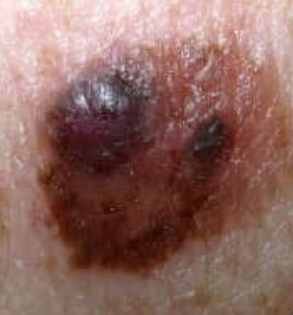

[0. 0. 0. 0. 0. 1. 0. 0. 0.]
The ml says nv


In [14]:
#importing requirements for model testing.
import cv2
from keras.models import load_model
from IPython.display import Image, display

#defining a function that reads an image in correct format
def prepare(filepath):
    
            image_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
            new_array = cv2.resize(image_array, (28, 28))  # resize image to match model's expected sizing
            return new_array.reshape(-1, 28, 28, 1)
        
        
filepath = r"C:\Users\Home\Downloads\nv.png"
display(Image(filepath))
    


#reversing order of key for use in upcoming logic statements                             
key = {"akiec":0,"bcc":1,"bkl":2,"df":3,"mel":4,"nv":5,"vasc":6,"norm":7,"obj":8}
key = {v: k for k, v in key.items()}
#print(key)

#loading back in the model from the h5 we created
cnn_model = load_model("cancertech.h5")
#fetching the prediction given the path to the image
prediction = cnn_model.predict(prepare(filepath))

#prints an array of the machine learning algorithm's prediction
print(prediction[0])

#logic to print the prediction of the machine learning
if round(prediction[0][0]) == 1:
    print("The ml says " + key[0])
elif round(prediction[0][1]) == 1:
    print("The ml says " + key[1])
elif round(prediction[0][2]) == 1:
    print("The ml says " + key[2])
elif round(prediction[0][3]) == 1:
    print("The ml says " + key[3])
elif round(prediction[0][4]) == 1:
    print("The ml says " + key[4])
elif round(prediction[0][5]) == 1:
    print("The ml says " + key[5])
elif round(prediction[0][6]) == 1:
    print("The ml says " + key[6])
elif round(prediction[0][7]) == 1:
    print("The ml says your skin is normal")
elif round(prediction[0][8]) == 1:
    print("The ml says it could not detect any skin... please try again")
          


